<h1> What is Pandas?</h1>
<img src='https://media.giphy.com/media/AGl4BWvZNfvby/giphy.gif'>
<ul>
<li>Pandas is a package providing fast, flexible, and expressive data structures designed to make working with table (relational and labeled) data both easy and intuitive.</li>
<li>Data feels like excel spreadsheets, but you can update it and manipulate it using python code.</li>
    <li> <a href='https://pandas.pydata.org/' target="_blank"> https://pandas.pydata.org/</a></li>
</ul>


<h1> Why use Pandas? </h1>
<ul>
<li> Easy handling of missing data</li>
<li> Size mutabilty (harder with numpy arrays) </li>
<li> Automatic and explicit data alignment </li>
<li> Database like query ability </li>
<li> Powerful, flexible group by functionality </li>
</ul>

<h2> Other Reasons? </h2>
<ul>
<li> Intelligent label-based slicing</li>
<li> Fancy Indexing and Subsetting </li>
<li> Intuitive Merging and Joining data sets </li>
<li> Database like query ability </li>
<li> Flexible reshaping and pivoting of data sets </li>
</ul>

<h1> The ArcGIS API for Python </h1>
<h2> A powerful Python library for spatial analysis, mapping and GIS </h2>
<p>
<a href='https://developers.arcgis.com/python/' target='_blank'>ArcGIS API for Python </a> is another ESRI Python library (besides arcpy) for working with maps and geospatial data, powered by web GIS. Arcpy installes with ArcGIS for Desktop (ArcGIS Pro).  </p>
<p> It provides simple and efficient tools for sophisticated vector and raster analysis, geocoding, map making, routing and directions, as well as for organizing and managing a GIS with users, groups and information items. In addition to working with your own data, the library enables access to ready to use maps and curated geographic data from Esri and other authoritative sources. We will introduce these concepts this week, but get into more details next week.
</p>
<p>It also integrates well with the scientific Python ecosystem and includes rich support for Pandas and Jupyter notebook. We will cover this this week</p>

In [1]:
#This loads one of the libraries we are introducing this week, the ArcGIS API for Python explained above
from arcgis import GIS

#This loads arcpy which we can use for running ArcGIS Pro tools and manipulating low level data (e.g. through cursors)
import arcpy

#This libary is for reading web resources using a URL
import urllib.request as rq

#This loads the pandas library which we are also introducing today.
#The basic unit of pandas is a "DataFrame" which you can think of kinda like a speadsheet.
#Read more here: https://pandas.pydata.org/
import pandas as pd

#This little line of code makes to so plots show up inline
#we will talk a little about matplotlib this week and next
#It is a library for plotting
%matplotlib inline

#This loads a specific part of the ArcGIS API for Python 
#(The features sub module for manipulation of GIS vector data)
#It allows you to create an ESRI specific data frame (called a spatially enabled data frame)
#Read more here: https://developers.arcgis.com/python/guide/introduction-to-the-spatially-enabled-dataframe/
from arcgis.features import GeoAccessor, GeoSeriesAccessor



In [2]:
#Make an anon connection to ArcGIS Online
gis = GIS()

#Make a secure connection with ArcGIS Online (i.e. login into ArcGIS.com)
gis = GIS("https://arcgis.com","graber")

Enter password: ········


<h1> A "Series" is a basic structure in pandas </h1>
<p> A series can be any datatype, but everything in a series is the same datatype</p>

In [4]:
import numpy as np
data = np.random.randn(10)
data

array([ 0.64762653,  0.00461346, -0.6911744 , -0.02203828,  1.53722993,
       -1.0910951 ,  0.39156219,  1.55124522,  0.72771571,  0.14514299])

In [11]:
series = pd.Series(data)
series

0    0.647627
1    0.004613
2   -0.691174
3   -0.022038
4    1.537230
5   -1.091095
6    0.391562
7    1.551245
8    0.727716
9    0.145143
dtype: float64

<h1> DataFrames </h1>
<p> Series are kinda cool, but DataFrames are really useful.  As mentioned above they are 2d data structures that all you to manipulate data in a table.</p>
<p> Here is an example:</p>

In [14]:
#DataFrames are built Row by row not column by column.
data1 = np.random.rand(10)
data2 = np.random.rand(10)
data3 = np.random.rand(10)
tdata = np.random.rand(10)
data4 = (tdata * 100).astype(int)

fields = {0:"red",1:"green", 2:"blue", 3:"height"}
data = [data1,data2,data3,data4]
data, fields

([array([0.33600608, 0.15865412, 0.69856992, 0.2269698 , 0.69492884,
         0.44925612, 0.7435877 , 0.43021098, 0.19298247, 0.2495802 ]),
  array([0.40293552, 0.28164929, 0.06942845, 0.65039323, 0.10472327,
         0.57774798, 0.93649019, 0.29026564, 0.71616507, 0.26941222]),
  array([0.10657698, 0.9726306 , 0.56411235, 0.4263604 , 0.71611082,
         0.06742579, 0.55727793, 0.51261206, 0.47175238, 0.90952323]),
  array([88, 65, 46, 31, 45, 49,  2,  6, 40, 66])],
 {0: 'red', 1: 'green', 2: 'blue', 3: 'height'})

When I turn it into a Dataframe the sequences of data become rows by default.

In [15]:
tempdf = pd.DataFrame(data)
tempdf

,0,1,2,3,4,5,6,7,8,9
0,0.336006,0.158654,0.698570,0.226970,0.694929,0.449256,0.743588,0.430211,0.192982,0.249580
1,0.402936,0.281649,0.069428,0.650393,0.104723,0.577748,0.936490,0.290266,0.716165,0.269412
2,0.106577,0.972631,0.564112,0.426360,0.716111,0.067426,0.557278,0.512612,0.471752,0.909523
3,88.000000,65.000000,46.000000,31.000000,45.000000,49.000000,2.000000,6.000000,40.000000,66.000000


DataFrame Methods can be chained together. Break down what each method does.

In [9]:
mydf = pd.DataFrame(data).transpose().rename(columns=fields).astype({'height': 'int32'})
mydf

,red,green,blue,height
0,0.481510,0.030165,0.048288,94
1,0.731228,0.697082,0.901798,66
2,0.848111,0.020350,0.657433,17
3,0.489335,0.297121,0.244677,5
4,0.624778,0.532240,0.693425,72
5,0.672309,0.752018,0.898582,20
6,0.642640,0.283896,0.159427,62
7,0.460619,0.929010,0.040443,91
8,0.204446,0.893704,0.763429,25
9,0.870356,0.652540,0.035596,25


In [18]:
#You can build them by column, but you have to use Series as the building blox then concat them.
s1 = pd.Series(np.random.rand(10), name='red')
s2 = pd.Series(np.random.rand(10), name='green')
s3 = pd.Series(np.random.rand(10), name='blue')
tdata = (np.random.rand(10) * 100).astype(int)
s4 = pd.Series(tdata, name='height')

mydf = pd.concat([s1, s2,s3,s4], axis=1)
mydf

,red,green,blue,height
0,0.723023,0.715081,0.145464,55
1,0.583464,0.492068,0.553281,23
2,0.281629,0.522669,0.704030,48
3,0.101975,0.930267,0.009161,42
4,0.360858,0.692428,0.869512,31
5,0.218431,0.370493,0.303136,7
6,0.460417,0.828235,0.594427,25
7,0.707410,0.138310,0.024661,17
8,0.081796,0.296390,0.710126,72
9,0.132637,0.033439,0.419971,91


Charting in Pandas is avalible through the matplotlib library.  
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#other-plots

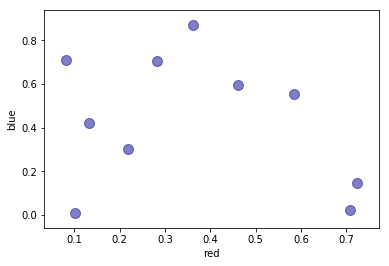

In [33]:
#Scatter Plot
myplot = mydf.plot.scatter(x='red',y='blue',c='DarkBlue', s = 100, alpha=0.5)

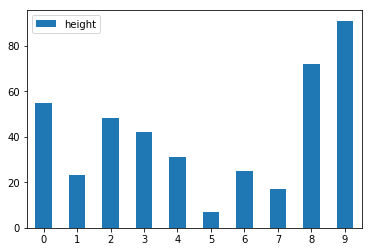

In [43]:
#Bar Plot
barchart = mydf.plot.bar(y='height', rot=1)

In [45]:
#You can create columns and make them equal to functions of other columns
#Use numpy.where to add conditionals
mydf['majority'] = np.where(mydf['red']>mydf['green'], 'red', 'green')
mydf['majority'] = np.where(mydf['blue']>mydf['red'], 'blue', mydf['majority'])
mydf['total'] = mydf['red'] + mydf['green'] + mydf['blue']
mydf

,red,green,blue,height,majority,zeros,total
0,0.723023,0.715081,0.145464,55,red,0,1.583568
1,0.583464,0.492068,0.553281,23,red,0,1.628813
2,0.281629,0.522669,0.704030,48,blue,0,1.508327
3,0.101975,0.930267,0.009161,42,green,0,1.041403
4,0.360858,0.692428,0.869512,31,blue,0,1.922798
5,0.218431,0.370493,0.303136,7,blue,0,0.892061
6,0.460417,0.828235,0.594427,25,blue,0,1.883080
7,0.707410,0.138310,0.024661,17,red,0,0.870381
8,0.081796,0.296390,0.710126,72,blue,0,1.088312
9,0.132637,0.033439,0.419971,91,blue,0,0.586048


In [46]:
groupedDF = mydf.groupby("majority")['red', 'green', "blue", "height"].mean()
groupedDF

,red,green,blue,height
majority,,,,
blue,0.255961,0.457276,0.600200,45.666667
green,0.101975,0.930267,0.009161,42.000000
red,0.671299,0.448486,0.241135,31.666667


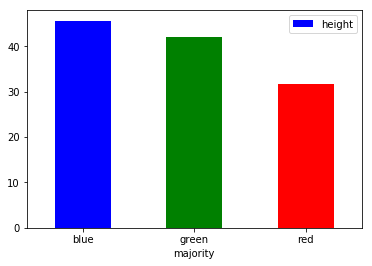

In [54]:
#Bar Plot of Grouped Data
clrs = groupedDF.reset_index()['majority']
barchart = groupedDF.plot.bar(y='height', rot=0, color=clrs)

In [48]:
mydf.describe()

,red,green,blue,height,zeros,total
count,10.000000,10.000000,10.000000,10.000000,10.0,10.000000
mean,0.365164,0.501938,0.433377,41.100000,0.0,1.300479
std,0.243604,0.295037,0.303208,26.074466,0.0,0.463344
min,0.081796,0.033439,0.009161,7.000000,0.0,0.586048
25%,0.154085,0.314916,0.184882,23.500000,0.0,0.929396
50%,0.321244,0.507368,0.486626,36.500000,0.0,1.298320
75%,0.552703,0.709418,0.676629,53.250000,0.0,1.617501
max,0.723023,0.930267,0.869512,91.000000,0.0,1.922798


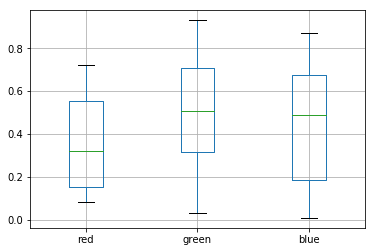

In [55]:
boxplot = mydf.boxplot(column=['red', 'green', 'blue'])

In [27]:
print(mydf.columns)
print('*******')
print(mydf.dtypes)

Index(['red', 'green', 'blue', 'height', 'majority'], dtype='object')
*******
red         float64
green       float64
blue        float64
height        int32
majority     object
dtype: object


<h2>Accessing Data in a DataFrame</h2>
<ul>
    <li>Zero based indexing (like most of Python)</li>
    <li>Use "iloc" to access a row.</li>
    <li>Use the ["column name"] to access just a column, like a dictionary. (Think of a Dataframe as a dictionary of columns.)</li>
</ul>

In [57]:
newdf = mydf[['red', 'green']].iloc[4:7]
newdf

,red,green
4,0.360858,0.692428
5,0.218431,0.370493
6,0.460417,0.828235


In [62]:
mydf[['red', 'green']].query('green > 0.5')

,red,green
0,0.723023,0.715081
2,0.281629,0.522669
3,0.101975,0.930267
4,0.360858,0.692428
6,0.460417,0.828235


<h1>Now let's try with some real geographic data!</h1>

In [86]:
#Read from URL (Must not be to big)
#url = 'https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD'
#f = rq.urlopen(url)

#Read from file -- Better if Big
f = "SelfieDeaths.csv"

#This is how to read a CSV into Pandas Data Frame that ArcGIS can read
#then fill any missing values with a value of your choice
#Finally convert the dataFrame into a spatial Data Frame (ArcGIS API for Python)
SelfieDeaths = pd.read_csv(f).fillna(0)
SelfieDeaths.tail()

,Date,Location,Casualties,Type,Latitude,Longitude
171,201907,"Nowshera, Pakistan",1,Fall,34.010464,71.987553
172,201907,Pakistan,2,Drowned,30.375321,69.345114
173,201908,"Sydney, Australia",1,Fall,-33.868820,151.209296
174,201909,"Pavagadh, India",1,Fall,22.462015,73.524074
175,201910,India,4,Fall,20.593682,78.962881


In [87]:
#Convert the dataFrame into a Spatiallially Enabled Data Frame (ArcGIS API for Python)
sdfSelfie = pd.DataFrame.spatial.from_xy(SelfieDeaths, "Longitude", "Latitude", sr=4326)
sdfSelfie.head()

,Date,Location,Casualties,Type,Latitude,Longitude,SHAPE
0,201110,United States,3,Transport,40.730610,-73.935242,"{""x"": -73.935242, ""y"": 40.73061, ""spatialRefer..."
1,201312,London,1,Transport,51.509865,-0.118092,"{""x"": -0.118092, ""y"": 51.509865000000005, ""spa..."
2,201403,Spain,1,Electrocution,40.416775,-3.703790,"{""x"": -3.70379, ""y"": 40.416775, ""spatialRefere..."
3,201404,North Carolina,1,Transport,35.782169,-80.793457,"{""x"": -80.79345699999999, ""y"": 35.782169, ""spa..."
4,205106,Russia,1,Fall,61.524000,105.318800,"{""x"": 105.3188, ""y"": 61.523999999999994, ""spat..."


In [88]:
#apply lets you apply a little function called a lambda
sdfSelfie["Year"] = sdfSelfie.Date.apply(lambda x: str(x)[0:4])
sdfSelfie["Month"] = sdfSelfie.Date.apply(lambda x: str(x)[4:6])
sdfSelfie["Day"] = 1

#The to_datetime function lets you add a datetime colum that can be useful for sorting
sdfSelfie['DataTime'] = pd.to_datetime(sdfSelfie[["Year", "Month", "Day"]])
sdfSelfie.sort_values(by=['DataTime']).head()

,Date,Location,Casualties,Type,Latitude,Longitude,SHAPE,Year,Month,Day,DataTime
0,201110,United States,3,Transport,40.730610,-73.935242,"{""x"": -73.935242, ""y"": 40.73061, ""spatialRefer...",2011,10,1,2011-10-01
1,201312,London,1,Transport,51.509865,-0.118092,"{""x"": -0.118092, ""y"": 51.509865000000005, ""spa...",2013,12,1,2013-12-01
2,201403,Spain,1,Electrocution,40.416775,-3.703790,"{""x"": -3.70379, ""y"": 40.416775, ""spatialRefere...",2014,03,1,2014-03-01
3,201404,North Carolina,1,Transport,35.782169,-80.793457,"{""x"": -80.79345699999999, ""y"": 35.782169, ""spa...",2014,04,1,2014-04-01
5,201405,India,1,Transport,20.593700,78.962900,"{""x"": 78.9629, ""y"": 20.5937, ""spatialReference...",2014,05,1,2014-05-01


In [90]:
#try and show time series chart
sdfSelfie.tail()

,Date,Location,Casualties,Type,Latitude,Longitude,SHAPE,Year,Month,Day,DataTime
171,201907,"Nowshera, Pakistan",1,Fall,34.010464,71.987553,"{""x"": 71.987553, ""y"": 34.010464, ""spatialRefer...",2019,07,1,2019-07-01
172,201907,Pakistan,2,Drowned,30.375321,69.345114,"{""x"": 69.345114, ""y"": 30.375321000000003, ""spa...",2019,07,1,2019-07-01
173,201908,"Sydney, Australia",1,Fall,-33.868820,151.209296,"{""x"": 151.209296, ""y"": -33.86882, ""spatialRefe...",2019,08,1,2019-08-01
174,201909,"Pavagadh, India",1,Fall,22.462015,73.524074,"{""x"": 73.524074, ""y"": 22.462015, ""spatialRefer...",2019,09,1,2019-09-01
175,201910,India,4,Fall,20.593682,78.962881,"{""x"": 78.96288100000001, ""y"": 20.593682, ""spat...",2019,10,1,2019-10-01


In [112]:
m1 = GIS().map()
m1.center = [34,-89]
m1

MapView(layout=Layout(height='400px', width='100%'))

In [114]:
sdfSelfie.spatial.plot(map_widget= m1)
sdfSelfie.spatial.plot(map_widget= m1, renderer_type='u', col='Type')

True

In [109]:
sdfSelfie2018 = sdfSelfie.query("DataTime > 2016")
sdf1 = sdfSelfie2018.groupby('Type')['Latitude', 'Longitude'].mean()
sdf2 = sdfSelfie2018.groupby('Type')['Casualties'].count()

In [110]:
dfGrouped = pd.merge(sdf2, sdf1, on=['Type'])
dfGrouped.rename(columns={"Casualties": "Count"}, inplace = True)
sdfGrouped = pd.DataFrame.spatial.from_xy(dfGrouped, "Longitude", "Latitude", sr=4326)
sdfGroupedSorted = sdfGrouped.sort_values(by=['Count'])
sdfGroupedSorted

,Count,Latitude,Longitude,SHAPE
Type,,,,
Fire,1,13.082680,80.270718,"{""x"": 80.270718, ""y"": 13.08268, ""spatialRefere..."
Other,1,34.876195,73.693352,"{""x"": 73.693352, ""y"": 34.876195, ""spatialRefer..."
Electrocution,6,39.513511,53.873280,"{""x"": 53.873279833333335, ""y"": 39.513511, ""spa..."
Firearm,6,19.983978,34.608645,"{""x"": 34.60864466666666, ""y"": 19.9839783333333..."
Animal,8,21.462158,58.235136,"{""x"": 58.235135500000005, ""y"": 21.462157625000..."
Transport,19,21.944068,70.562218,"{""x"": 70.5622184210526, ""y"": 21.94406768421053..."
Drowned,31,21.597178,60.879504,"{""x"": 60.8795040967742, ""y"": 21.59717829032257..."
Fall,49,19.801246,29.566063,"{""x"": 29.566063142857125, ""y"": 19.801245571428..."


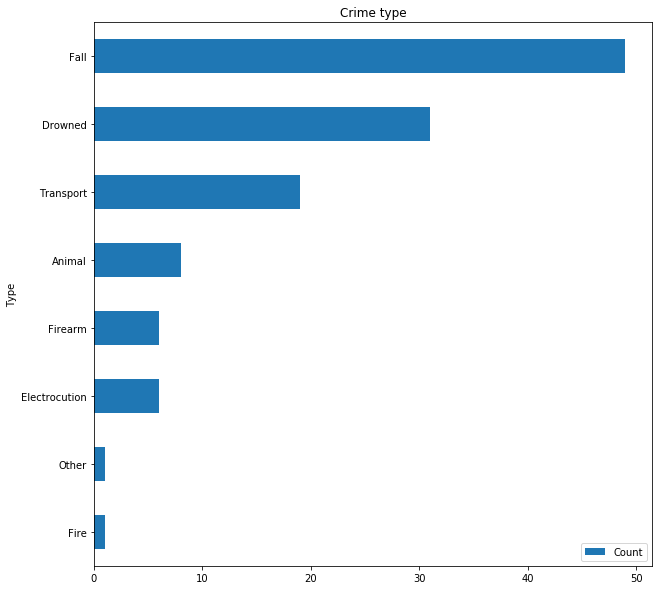

In [111]:
ax = sdfGroupedSorted.plot.barh(y='Count', width=0.5, fontsize=10, title="Crime type", figsize=(10,10))

In [113]:
sdfShow = sdfGroupedSorted.reset_index()
sdfShow.spatial.plot(map_widget= m1, renderer_type='u', col='Type')

True

In [116]:
#Save data out to File Geodatabase
sdfSelfie.spatial.to_featureclass(location=r"c:\temp\LabData.gdb\selfieTest")

'c:\\temp\\LabData.gdb\\selfieTest'

In [119]:
#Shared on ArcGIS.com
lyr = sdfSelfie.spatial.to_featurelayer('selfieDeaths', gis=gis)
lyr

<Item title:"selfieDeaths" type:Feature Layer Collection owner:graber>